In [1]:
# Install a pip package in the current Jupyter kernel - https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
import sys
!{sys.executable} -m pip install matplotlib numpy seaborn
sys.path.append('.')
import plotUtil


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


Distribution of the generation number of the current elites.

In [73]:
import json
#json_file_path = '/Users/bthj/QD/conf-duration_delta_pitch_combinations/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_thrshld_0.5_1685817612663.json'
# json_file_path = '/Users/bthj/QD/conf-static_mutation_rate_combinations/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_thrshld_0.5_1685817614609.json'
json_file_path = '/Users/bjornpjo/Developer/apps/kromosynth-cli/cli-app/conf/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_1693487991208.json'
x_multiplier = 1000  # Set this value as the step size in the JSON file name
title = "eliteGenerations: " + "additive bias"# json_file_path.split('/')[4]

# Read data from JSON file
data = plotUtil.read_data_from_json(json_file_path)

elite_generations_labeled_arrays = plotUtil.extract_data_arrays(data, 'eliteGenerationsLabeled')
elite_generations_arrays = plotUtil.extract_data_arrays(data, 'eliteGenerations')
print("elite_generations_labeled_arrays: " + str(len(elite_generations_labeled_arrays)))

elite_generations_labeled_arrays: 2


**For all evoruns**: Plot a histogram of the elite generations (when the current elite was first found):

In [52]:
import numpy as np
# copy/paste (largely) from durationPitchDeltaVelocityCombinations.ipynb
def subplot_par_chart_from_key_value_arrays(plt, ax, keys, values, title, hspace=0.0):

    if len(title) > 50:
        title = title[:50] + '\n' + title[50:]
        plt.subplots_adjust(hspace=0.4)
        # add space for the second line of the title
        plt.subplots_adjust(top=0.98)

    # trim all strings in keys to the first 25 characters
    keys = [key[:25] for key in keys]

    pos = np.arange(len(keys))
    ax.bar(pos, values, align='center')
    ax.set_xticks(pos)
    ax.set_xticklabels(keys, rotation=90)
    ax.set_title(title)
    
    ax.set_xlabel('Class elite generations')
    ax.set_ylabel('Number of occurrences')

    for index, label in enumerate(ax.get_xticklabels()):
        if index % 10 != 0:
            label.set_visible(False)

    plt.subplots_adjust(hspace=hspace)

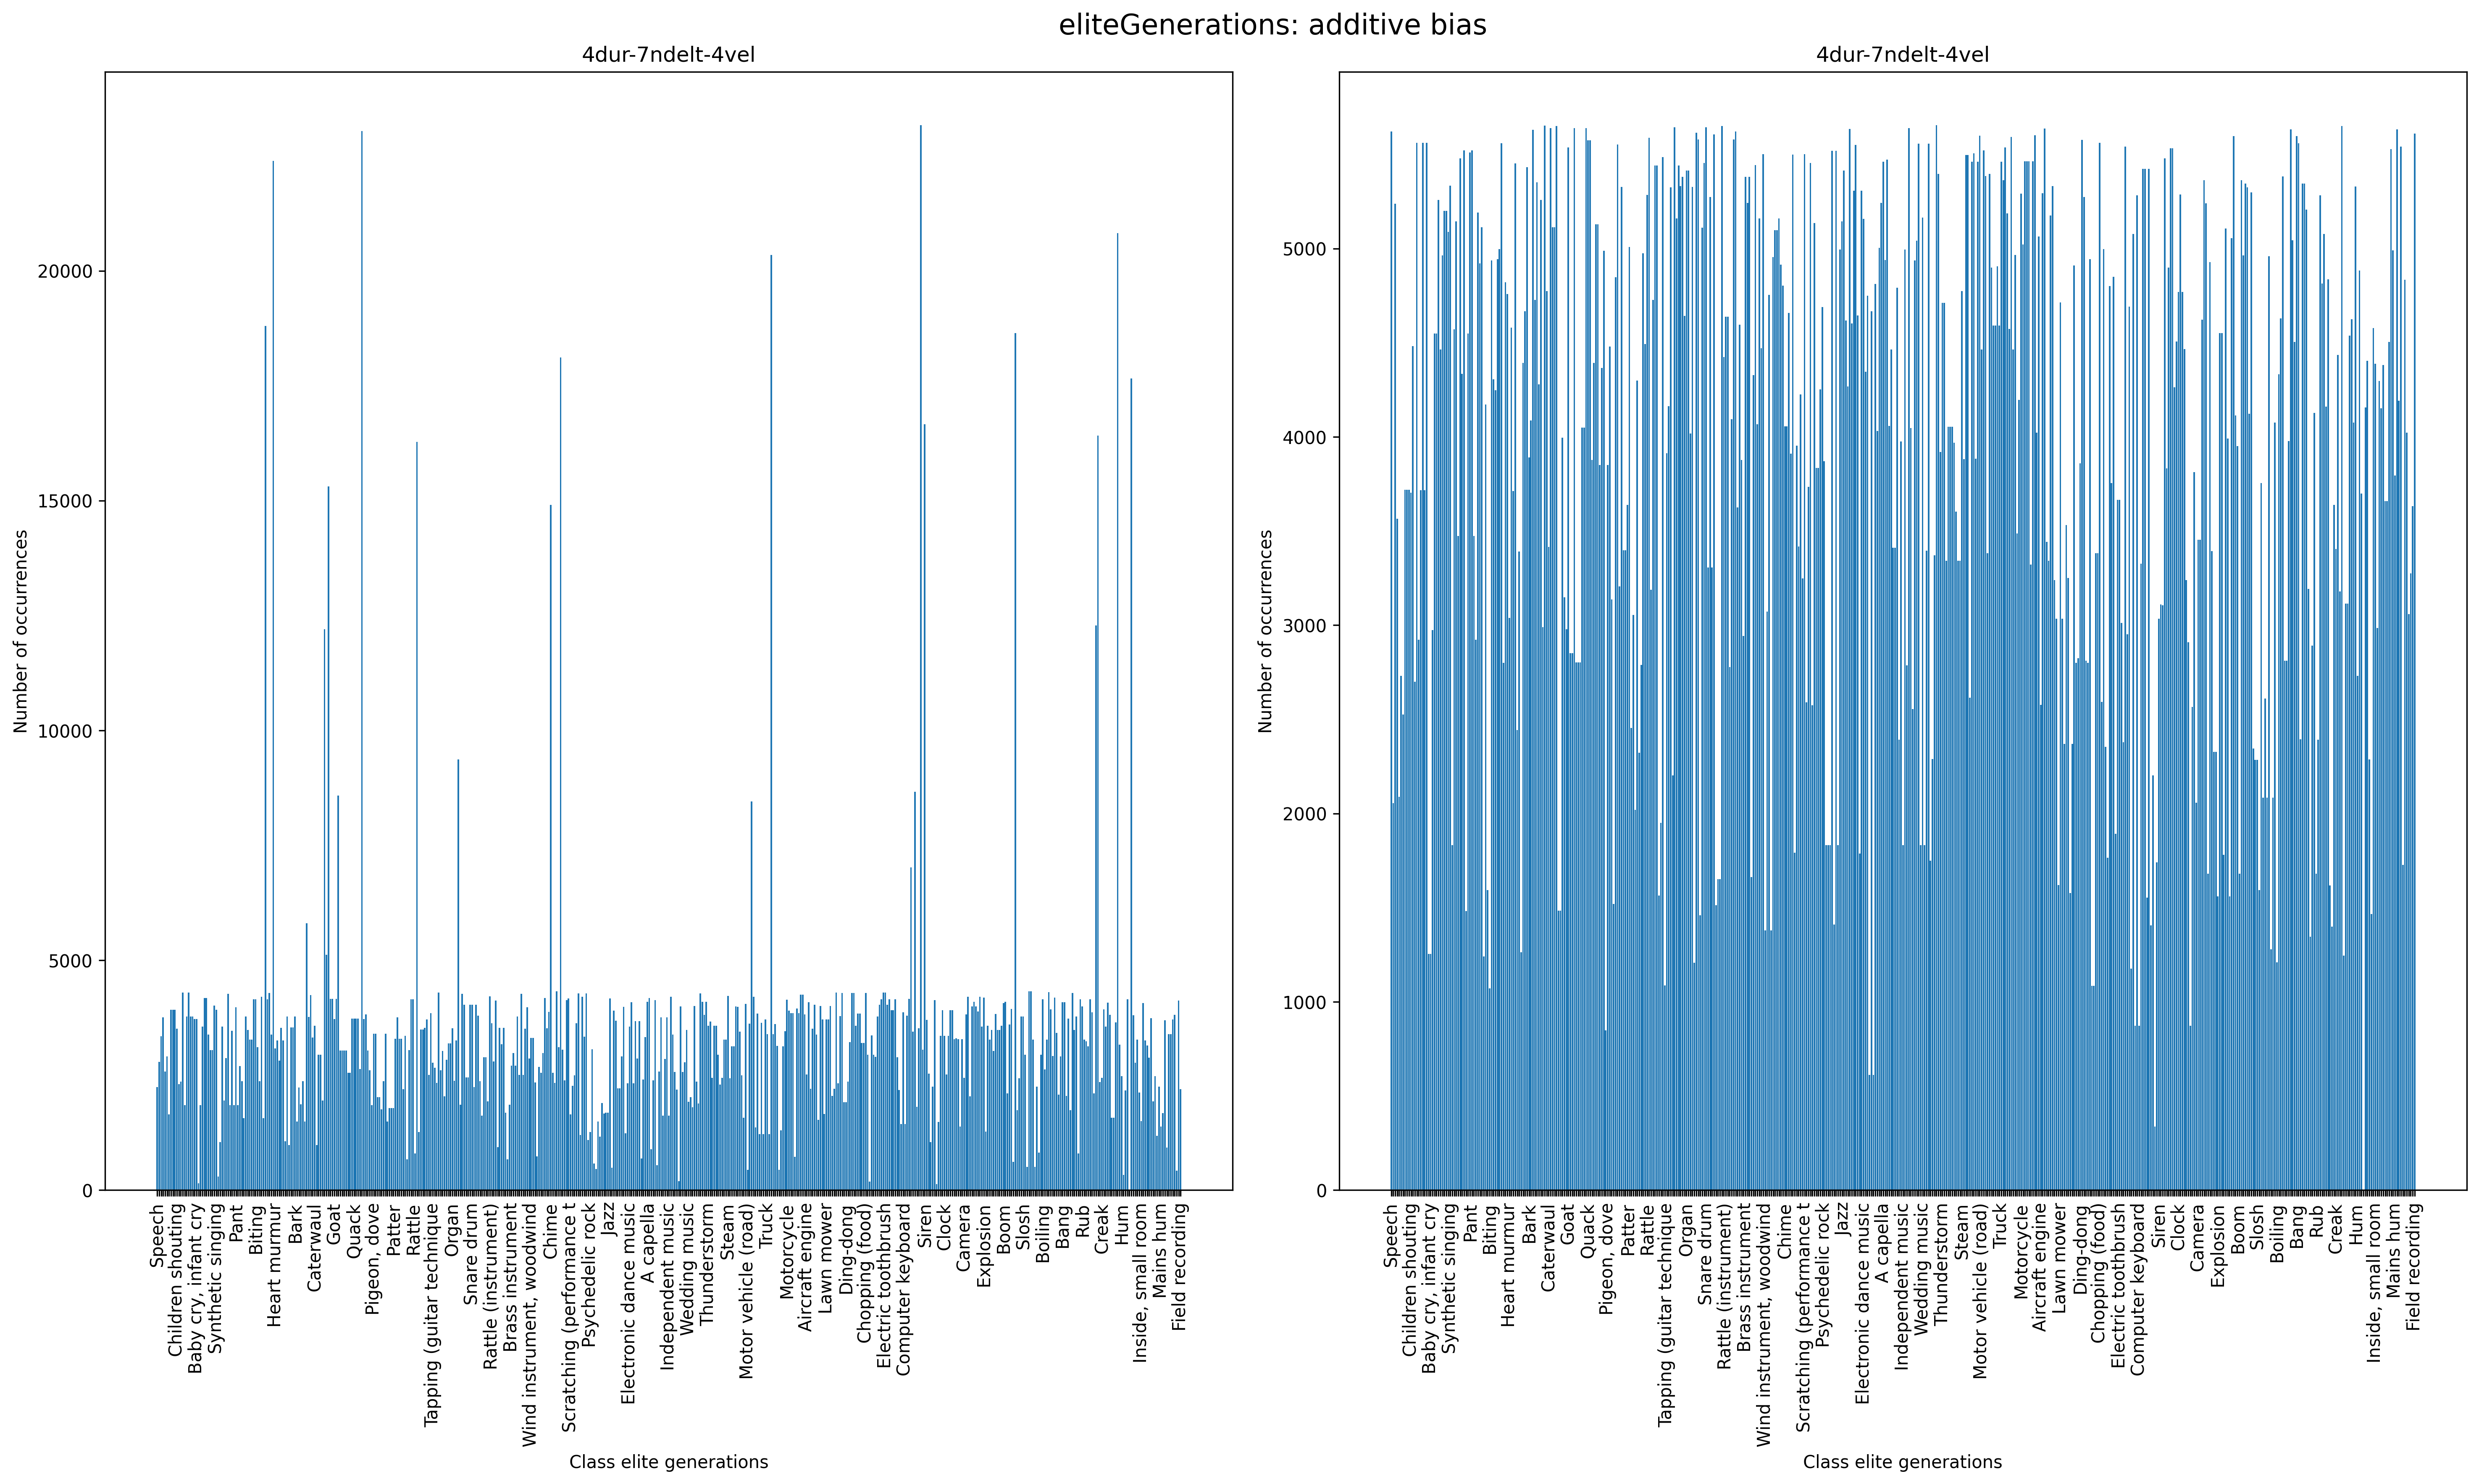

In [76]:
def eliteGenerationBarsPlotFunc(plt, ax, x_values, array, arrayLabel):
    subplot_par_chart_from_key_value_arrays(plt, ax, array.keys(), array.values(), arrayLabel, 0.5)

plotUtil.render_graphs(elite_generations_labeled_arrays, x_multiplier, eliteGenerationBarsPlotFunc, 20, 10, title, 300)

Single iteration bar chart:

In [14]:
# Get the dictionary with the elite generations data at evoRuns[0].iterations[0].eliteGenerationsLabeled
elite_generations = data['evoRuns'][0]['iterations'][0]['eliteGenerationsLabeled']
print(elite_generations)
# Get the array with the elite generations data at evoRuns[0].iterations[0].eliteGenerations
elite_generations_array = data['evoRuns'][0]['iterations'][0]['eliteGenerations']
print(elite_generations_array)

{'Speech': 128484, 'Child speech, kid speaking': 83598, 'Conversation': 164303, 'Narration, monologue': 175358, 'Babbling': 148869, 'Speech synthesizer': 121050, 'Shout': 174935, 'Bellow': 174930, 'Whoop': 174629, 'Yell': 175019, 'Children shouting': 174025, 'Screaming': 78931, 'Whispering': 91597, 'Laughter': 142803, 'Baby laughter': 51331, 'Giggle': 17947, 'Snicker': 153670, 'Belly laugh': 25675, 'Chuckle, chortle': 25675, 'Crying, sobbing': 150647, 'Baby cry, infant cry': 150647, 'Whimper': 119709, 'Wail, moan': 146292, 'Sigh': 54629, 'Singing': 147350, 'Choir': 128821, 'Yodeling': 172751, 'Chant': 172542, 'Mantra': 172542, 'Child singing': 131582, 'Synthetic singing': 122221, 'Rapping': 31729, 'Humming': 144341, 'Groan': 146335, 'Grunt': 172281, 'Whistling': 141072, 'Breathing': 154869, 'Wheeze': 148871, 'Snoring': 154869, 'Gasp': 151183, 'Pant': 135895, 'Snort': 151224, 'Cough': 113296, 'Throat clearing': 152331, 'Sneeze': 54593, 'Sniff': 151279, 'Run': 147813, 'Shuffle': 77453, '

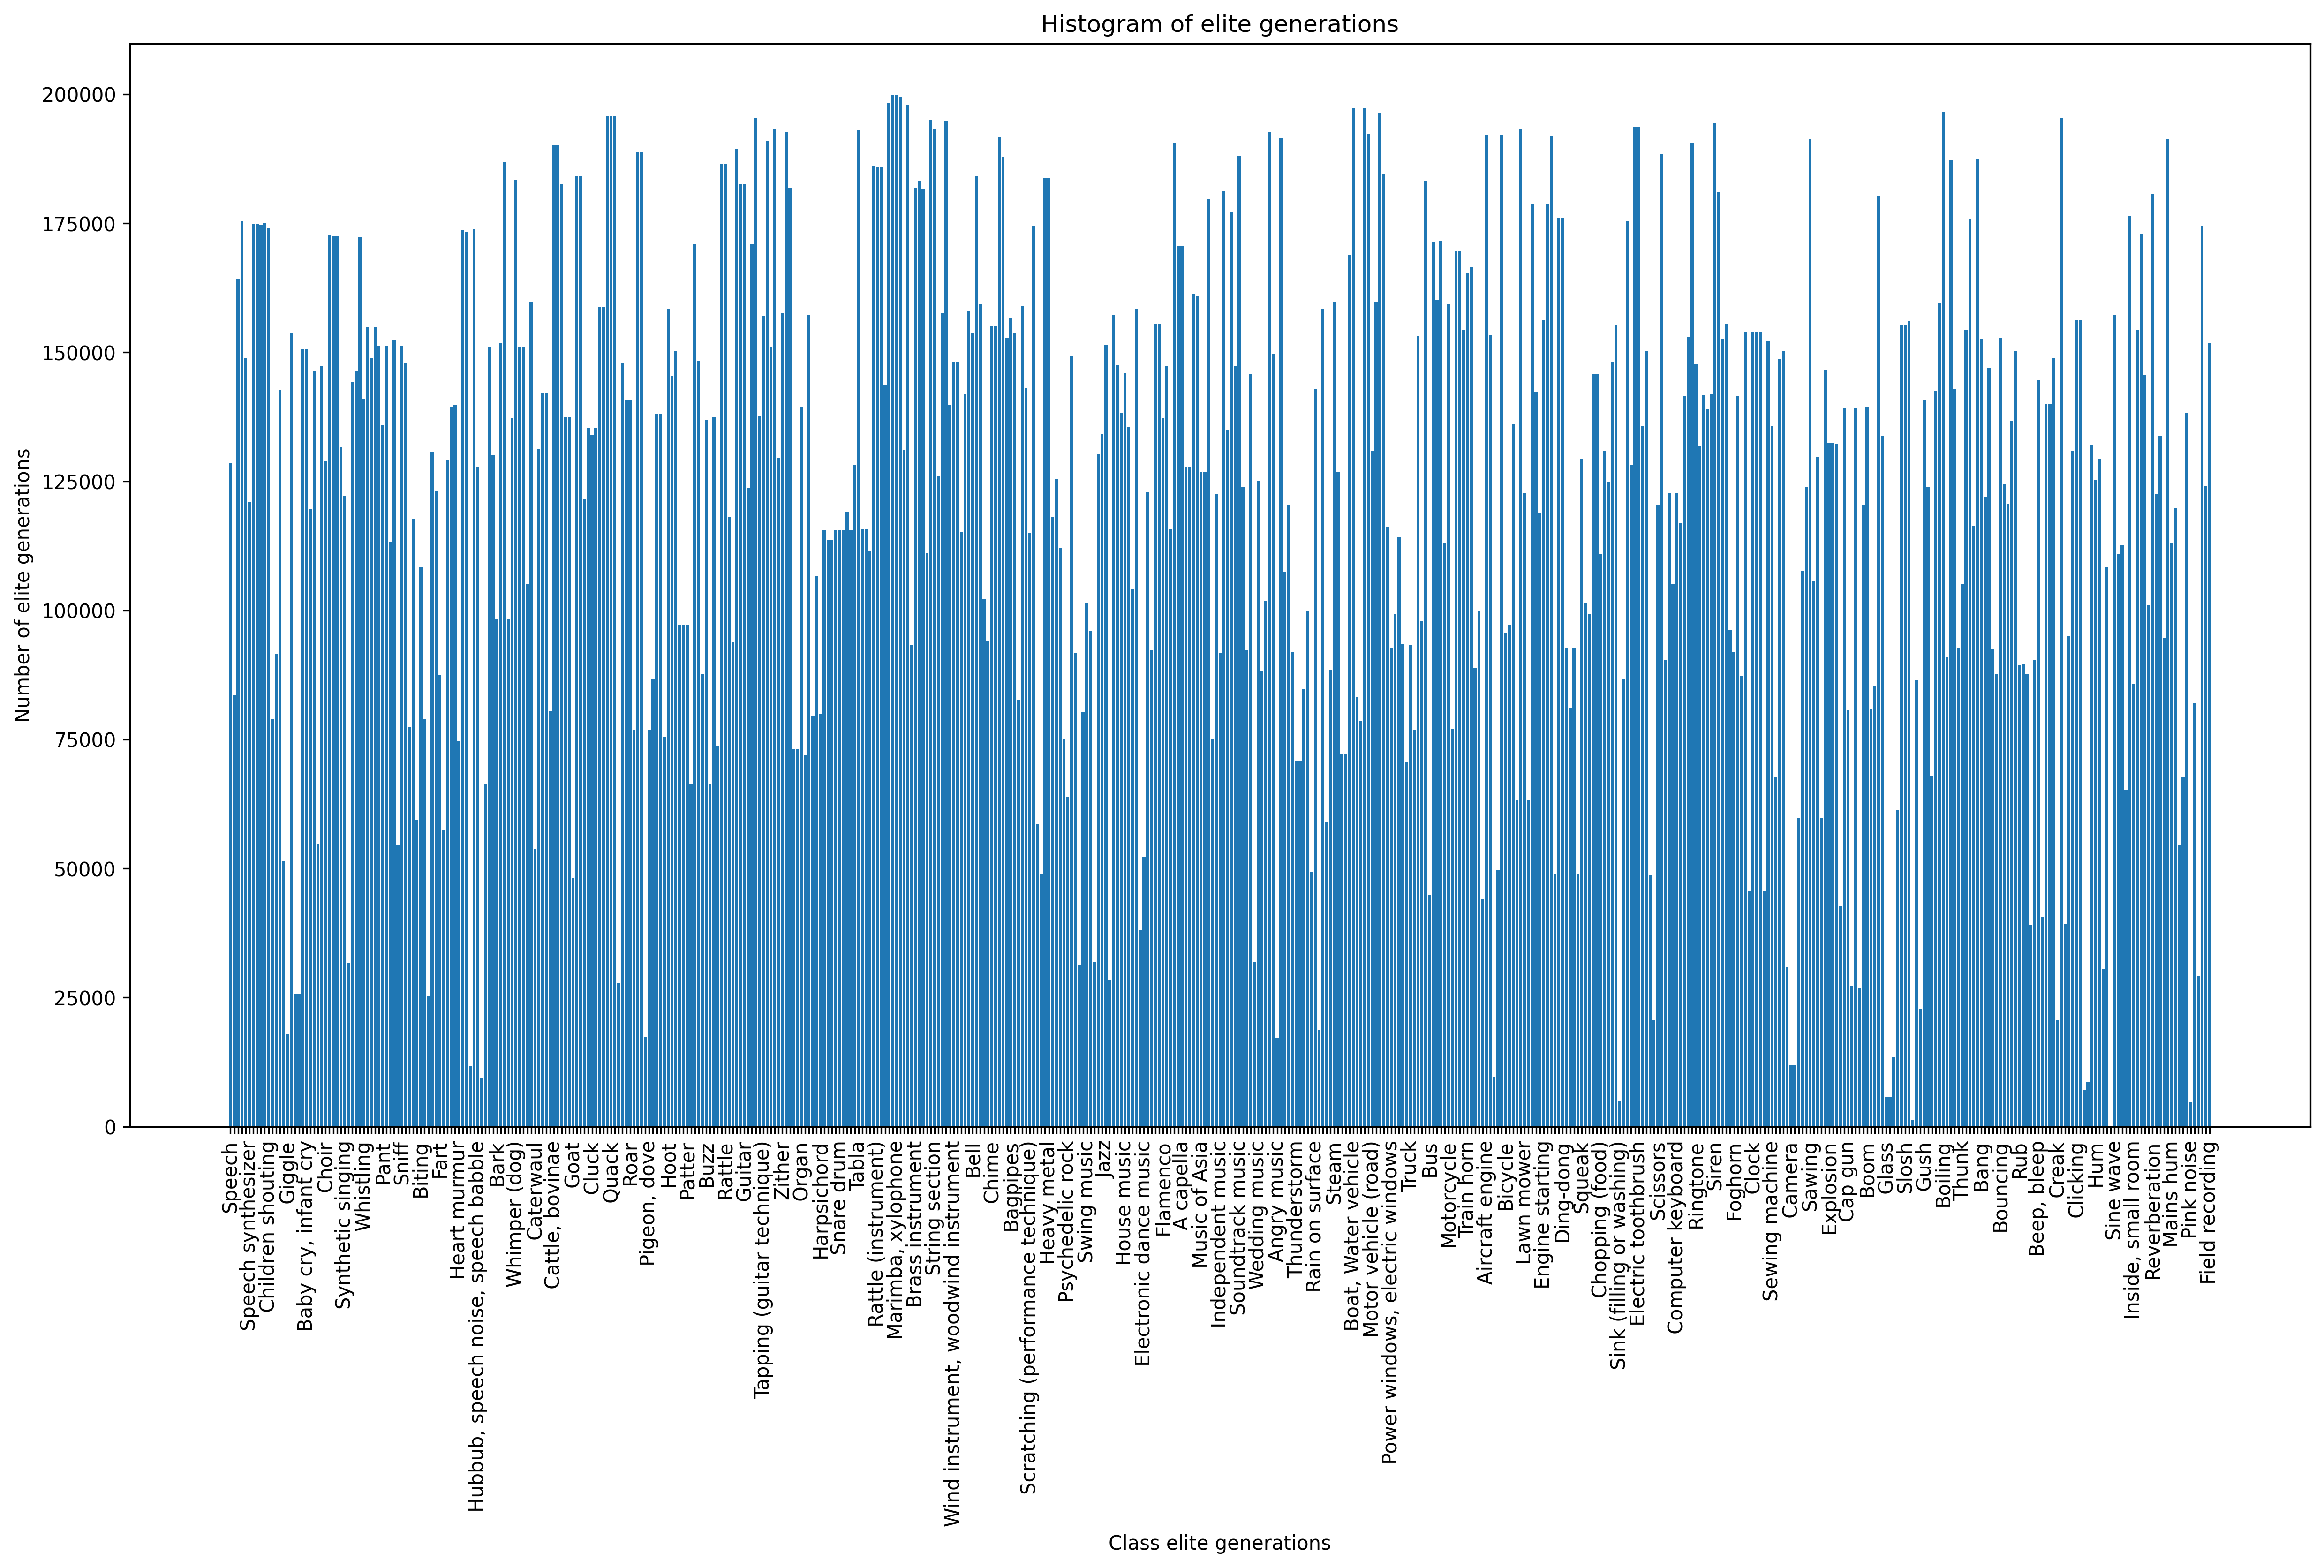

In [15]:
# Plot a histogram of the elite generations from the dictionary eliteGenerationsLabeled, with x-axis labels as keys from the dictionary
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.bar(elite_generations.keys(), elite_generations.values())
# rotate x-axis labels to avoid overlapping
plt.xticks(rotation=90)
# print only every 5th x-axis label
for index, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if index % 5 != 0:
        label.set_visible(False)
        
plt.xlabel('Class elite generations')
plt.ylabel('Number of elite generations')
plt.title('Histogram of elite generations')
plt.show()




**For all evoruns**: Plot a box and violin plot of the elite generations from the array elite_generations_array:

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

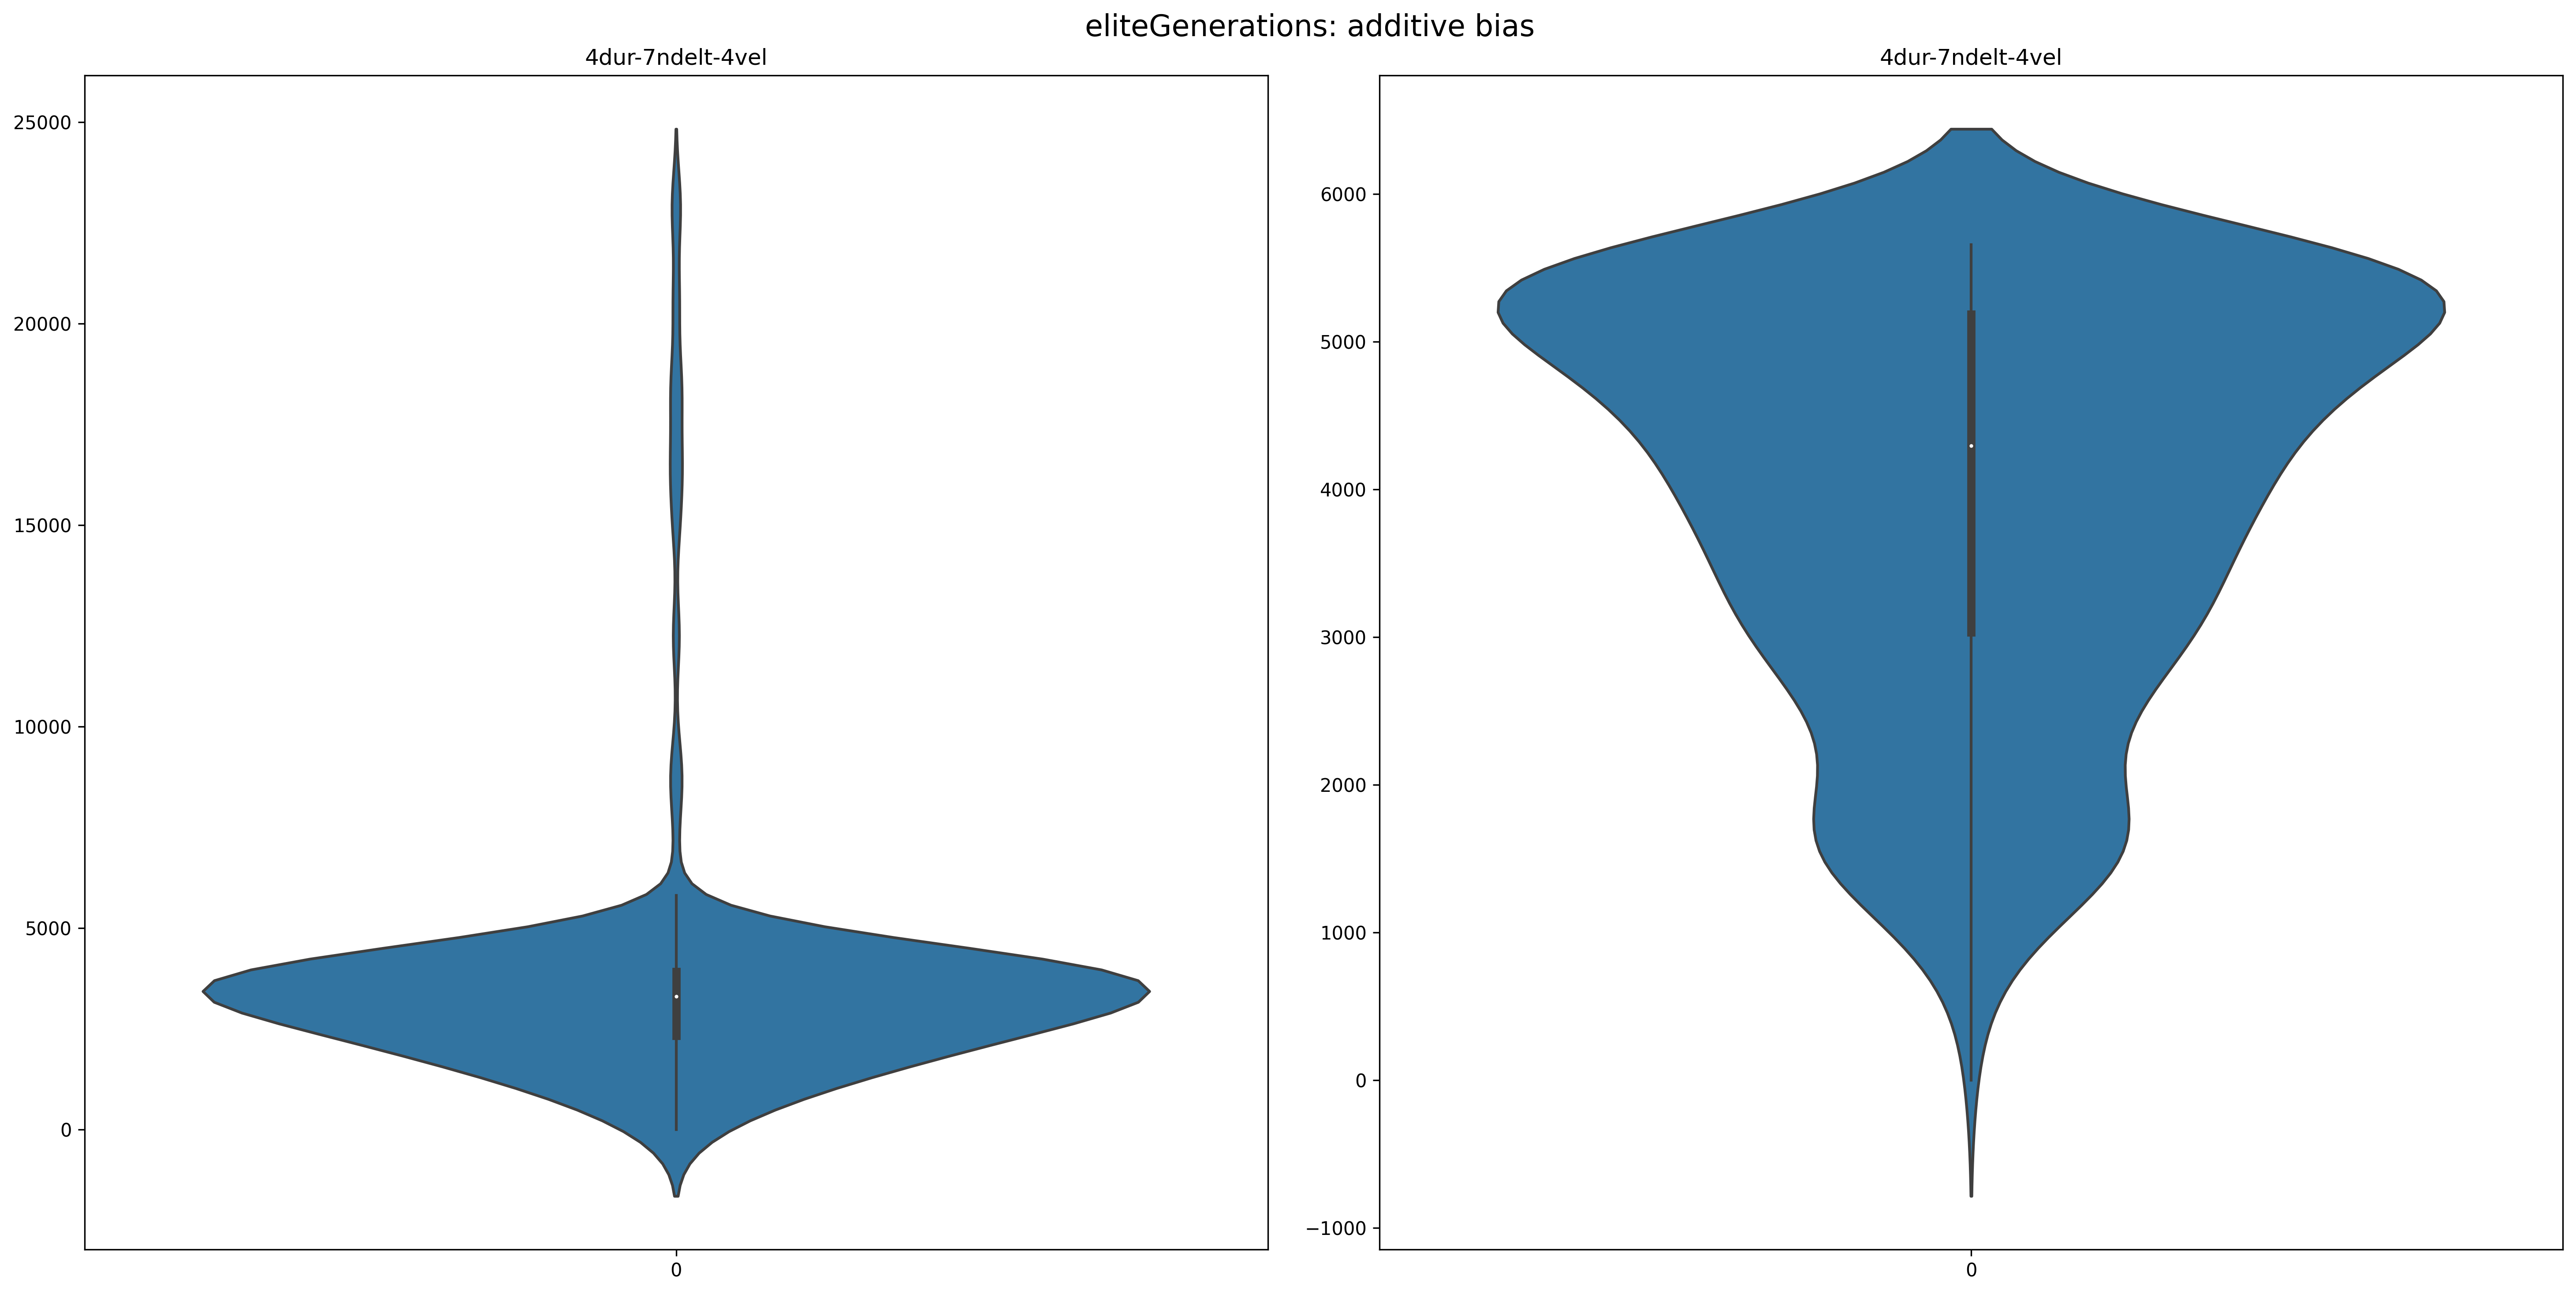

In [77]:
def subplot_violin_plot(plt, ax, x_values, array, title):
    sns.violinplot(ax=ax, data=array, inner="box")
    plt.title('Combined Box and Violin Plot')
    ax.set_title(title)
    # ax.violinplot(array, showmeans=False, showmedians=True)
    # ax.set_xticks(x_values)
    # ax.set_xticklabels(arrayLabel)
    # ax.set_xlabel('Class elite generations')
    # ax.set_ylabel('Number of elite generations')
    # ax.set_title('Violin plot of elite generations')
    # for index, label in enumerate(ax.get_xticklabels()):
    #     if index % 5 != 0:
    #         label.set_visible(False)

plotUtil.render_graphs(elite_generations_arrays, x_multiplier, subplot_violin_plot, 20, 10, title, 300)

**For all evoruns**: Plot a box and violin plot of the elite generations from the array elite_generations_array:

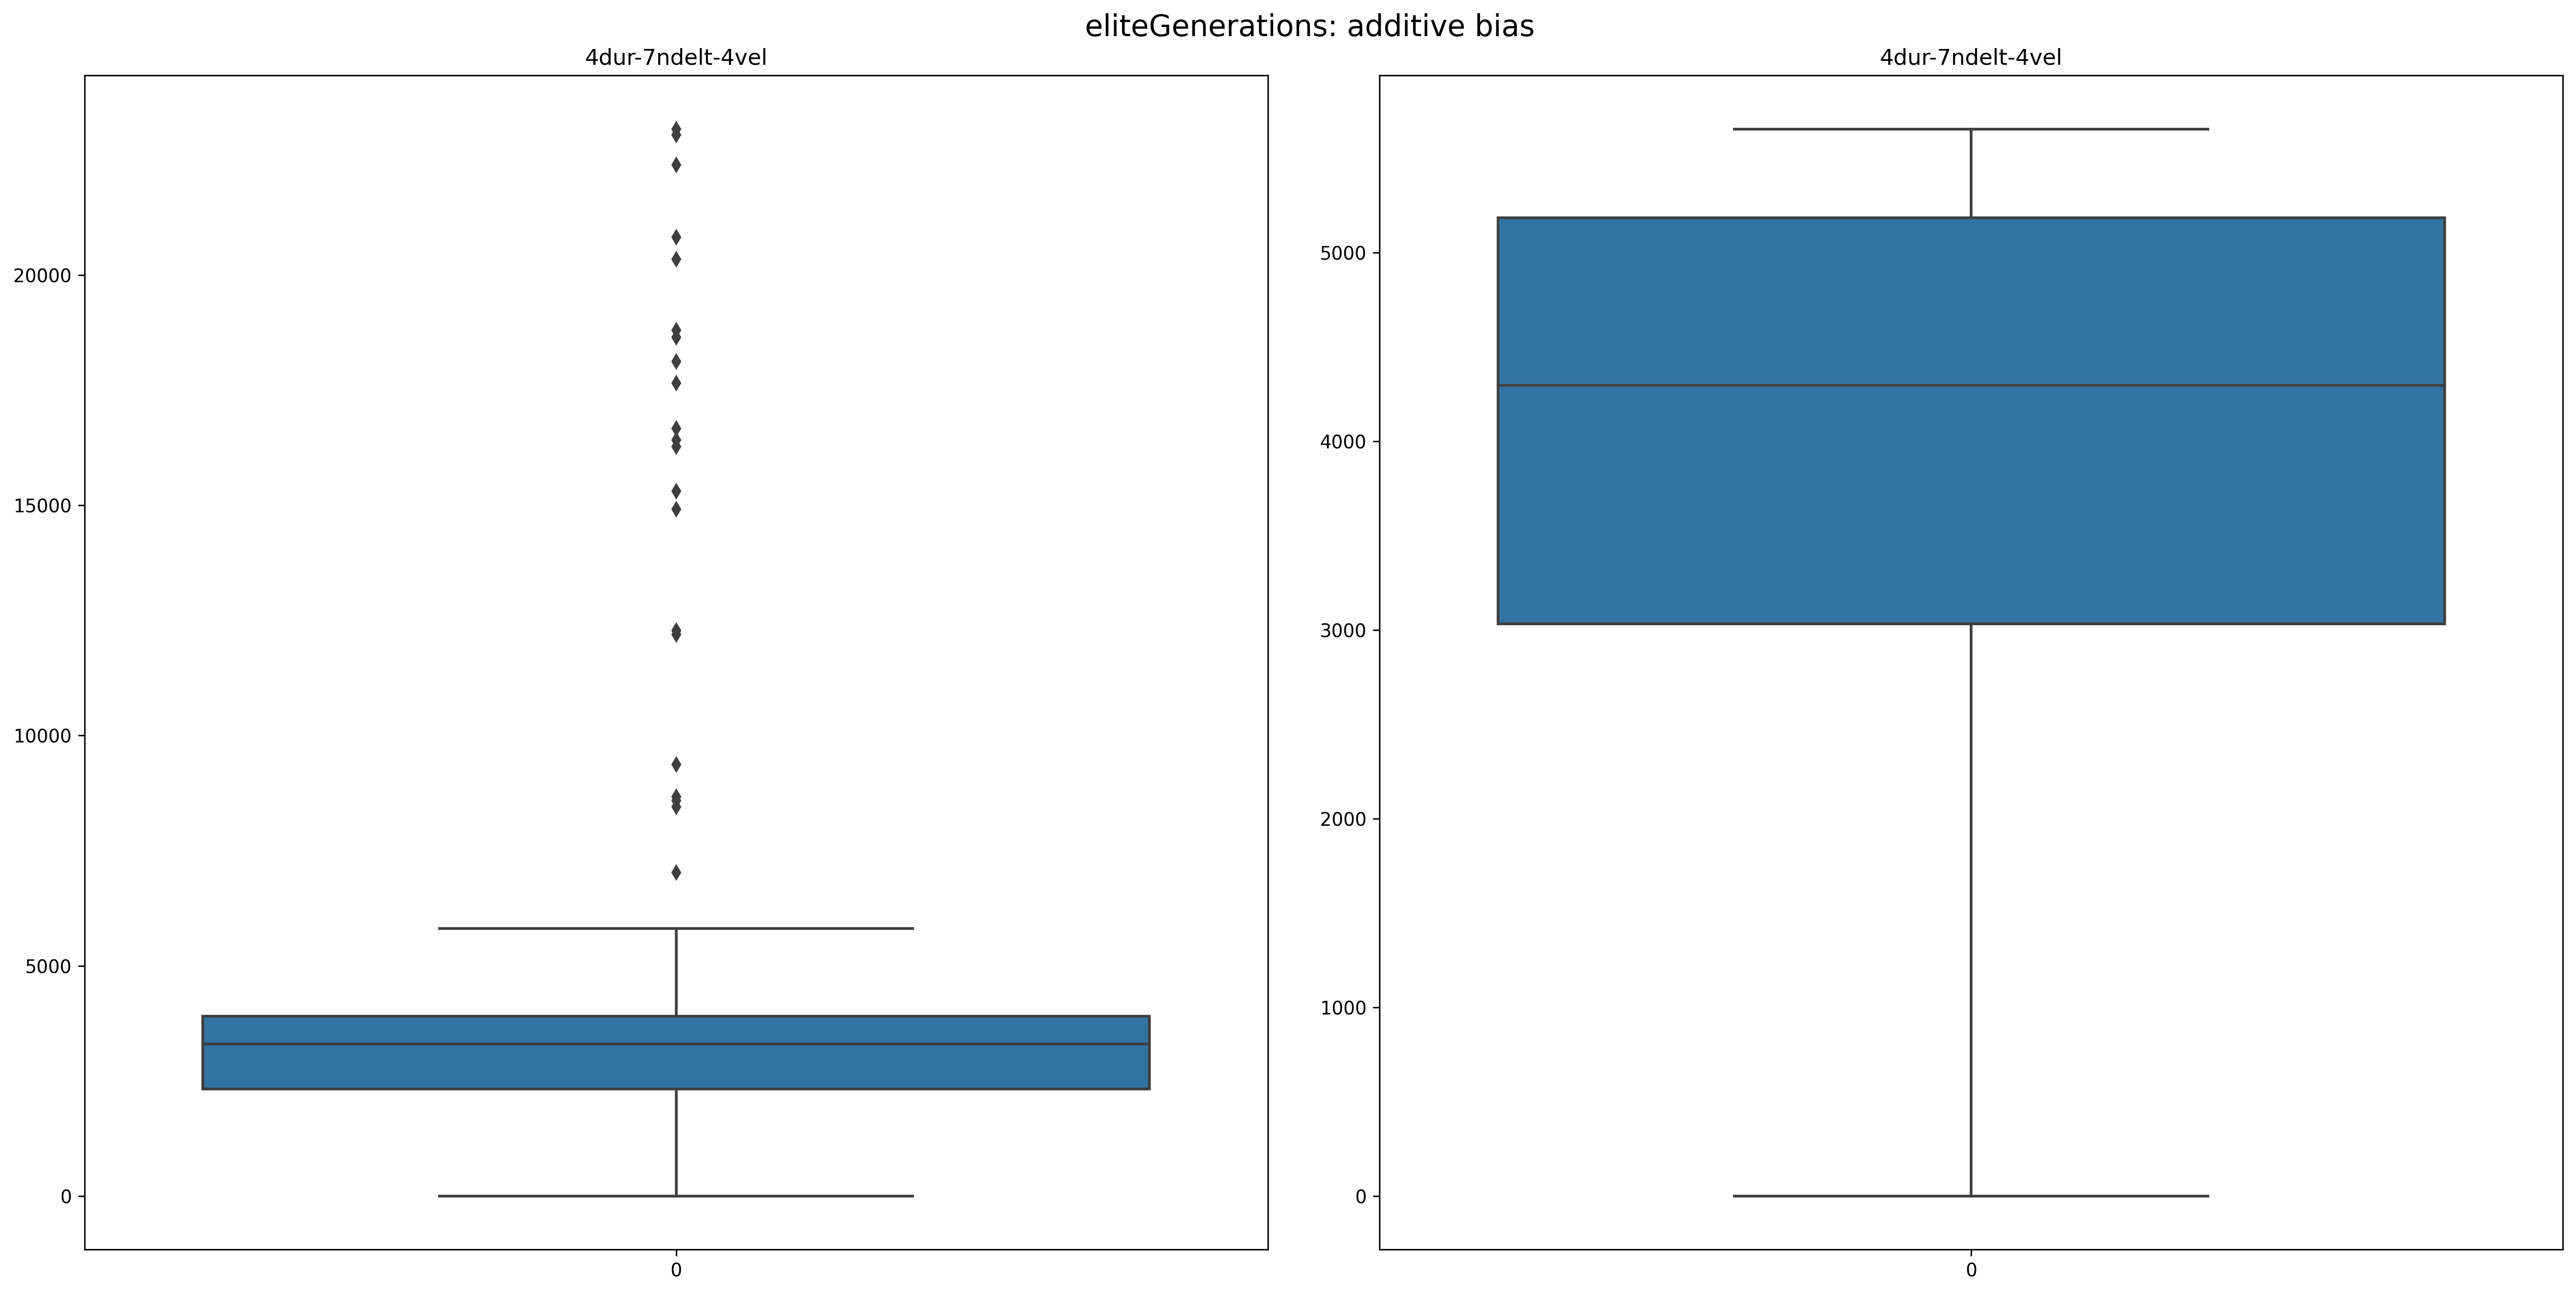

In [78]:
def subplot_box_plot(plt, ax, x_values, array, title):
  # Plot box plot
  sns.boxplot(data=array, ax=ax)
  ax.set_title(title)

plotUtil.render_graphs(elite_generations_arrays, x_multiplier, subplot_box_plot, 20, 10, title, 300)

In [ ]:
# Plot a box and violin plot of the elite generations from the array elite_generations_array

# Create a combined plot
sns.violinplot(data=elite_generations_array, inner="box")
plt.title('Combined Box and Violin Plot')

# Set y-axis limits
# plt.ylim(min(elite_generations_array), max(elite_generations_array))
# plt.ylim(0, 100000)

plt.show()




In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot box plot
sns.boxplot(data=elite_generations_array, ax=ax1)
ax1.set_title('Box Plot')

# Plot violin plot
sns.violinplot(data=elite_generations_array, ax=ax2)
ax2.set_title('Violin Plot')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()